<a href="https://colab.research.google.com/github/gabrieldepaiva/ProjetosParalelos/blob/main/Analise_Carteira_de_Acoes_Pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [44]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt

## Escolha dos ativos que compõem a carteira

In [115]:
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:')
print('')
# Código Base para incluir os ativos na carteira
opcao = 1
carteira = []

carteira.append(input('Digite o nome do ativo. - '))
opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))

while True:
  if opcao == 1:
    carteira.append(input('Digite o nome do ativo. - '))
    opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))
  elif opcao != 1 and opcao != 2:
    opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
  else:
    break

print('')
print(f'Sua carteira é composta pelos seguintes ativos: {carteira}')

#carteira = ['TAEE11.SA','BEES3.SA','ITSA4.SA','BBAS3.SA']

Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:

Digite o nome do ativo. Ex: PETR4.SA - TAEE11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. Ex: PETR4.SA - BEES3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. Ex: PETR4.SA - ITSA4.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. Ex: PETR4.SA - BBAS3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 2

Sua carteira é composta pelos seguintes ativos: ['TAEE11.SA', 'BEES3.SA', 'ITSA4.SA', 'BBAS3.SA']


## Atribuição dos Pesos para esses Ativos

In [116]:
lista = [carteira]

pesos = []

try:
  for loc, ativo in enumerate(carteira):
    pesos.append(float(input(f'Escreva o peso do ativo {carteira[loc]} (somente o número) - '))/100)
except:
  print('')
  print('\033[31mO valor digitado resultou em um erro.\033[m')
  print('Favor executar esta célula novamente!')

# pode ser que não precise dessa parte do código
else:
  if sum(pesos) != 1:
    print('')
    print(f'\033[31mA soma dos pesos resultou em {sum(pesos)*100}%, a soma deve ser 100%!\033[31m')
    print('Favor executar esta célula novamente!')

Escreva o peso do ativo TAEE11.SA (somente o número) - 20
Escreva o peso do ativo BEES3.SA (somente o número) - 25
Escreva o peso do ativo ITSA4.SA (somente o número) - 25
Escreva o peso do ativo BBAS3.SA (somente o número) - 30


## Importação da base de dados com as cotações diárias do Yahoo Finance

In [117]:
inicio = input('A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')

BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = data.DataReader(acao, data_source = 'yahoo',start = inicio)['Adj Close']

print('')
print('Importação dos dados realizada com sucesso!')

A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 1-1-2020

Importação dos dados realizada com sucesso!


In [118]:
# Resultado da tabela que foi gerada parcialmente
BaseDados.head()

,TAEE11.SA,BEES3.SA,ITSA4.SA,BBAS3.SA
Date,,,,
2020-01-02,28.625641,6.239425,13.812769,51.715546
2020-01-03,28.588511,6.229870,13.610631,51.629032
2020-01-06,28.764870,6.239425,13.581754,50.946541
2020-01-07,28.421438,6.239425,13.398867,50.562042
2020-01-08,28.133696,6.334975,13.196730,50.100639


## Inclusão da coluna com o retorno diário da carteira 

In [136]:
# Retorno acumulado de cada ação

retorno_acumulado = ((BaseDados/BaseDados.iloc[0])-1)*100

In [141]:
w = np.array(pesos)

ValorTotal = (retorno_acumulado * w)
ValorTotal['Retorno'] = ValorTotal.sum(axis=1)
ValorTotal.tail()

,TAEE11.SA,BEES3.SA,ITSA4.SA,BBAS3.SA,Retorno
Date,,,,,
2020-12-10,3.052633,-4.445220,-4.369904,-8.121703,-13.884194
2020-12-11,3.567230,-4.204813,-4.385016,-7.757355,-12.779954
2020-12-14,3.504645,-4.284949,-4.584108,-7.666290,-13.030702
2020-12-15,3.379473,-4.284949,-4.185926,-7.382042,-12.473443
2020-12-16,3.335723,-4.044542,-4.258322,-7.341435,-12.308577


## Inclusão dos dados do Benchmark - Ibovespa

In [193]:
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC')
print('')

benchmarks = []

q = 's'

q = input('Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - ')
if q == 's':

  # inclusão dos benchmarks
  escolha = 1

  benchmarks.append(input('Digite o código do benchmark. - '))
  escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))

  while True:
    if escolha == 1:
      benchmarks.append(input('Digite o nome do benchmark. - '))
      escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))
    elif opcao != 1 and opcao != 2:
      opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
    else:
      break

  print('')
  print(f'Os seguintes benchmarks foram incluídos : {benchmarks}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC

Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - s
Digite o código do benchmark. - ^GSPC
Deseja adicionar outro? [1] Sim / [2] Não - 1
Digite o nome do benchmark. - ^BVSP
Deseja adicionar outro? [1] Sim / [2] Não - 2

Os seguintes benchmarks foram incluídos : ['^GSPC', '^BVSP']


In [194]:
BaseDados2 = pd.DataFrame()

for indice in benchmarks:
  BaseDados2[indice] = data.DataReader(indice, data_source = 'yahoo',start = inicio)['Adj Close']

bmk_var_acum = ((BaseDados2/BaseDados2.iloc[0])-1)*100

print('Importação dos dados realizada com sucesso!')

Importação dos dados realizada com sucesso!


In [217]:
# Criação da tabela com o retorno acumulado da carteira e dos benchmarks selecionados

tabela_final = pd.DataFrame()

tabela_final['Sua Carteira'] = ValorTotal['Retorno']

for i in benchmarks:
  tabela_final[i] = bmk_var_acum[i]

In [218]:
tabela_final.head()

,Sua Carteira,^GSPC,^BVSP
Date,,,
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,-0.480264,-0.705987,-0.730352
2020-01-06,-0.766940,-0.355144,-1.429499
2020-01-07,-1.560944,-0.634473,-1.611665
2020-01-08,-2.012644,-0.147338,-1.961661


## Visualizações e Análises dos Dados Importados e Normalizados

Text(0, 0.5, 'Variação Percentual (%)')

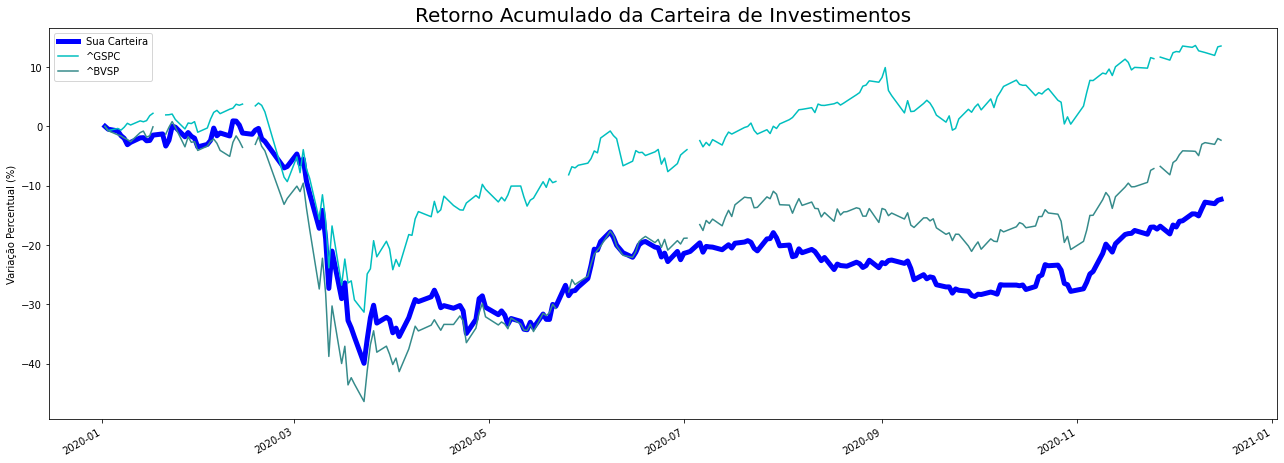

In [251]:
# Visualização das variações da carteira e benchmarks acumulados
cores = ['c','#368B8B','#276666','#276666','#0FA7A7']

tabela_final['Sua Carteira'].plot(color='b',LineWidth=5,figsize=(22,8))
for loc,j in enumerate(benchmarks):
  tabela_final[j].plot(color=cores[loc])
plt.legend()
plt.title ('Retorno Acumulado da Carteira de Investimentos',size=20)
plt.xlabel('')
plt.ylabel('Variação Percentual (%)')

# Diagnóstico Final da Carteira

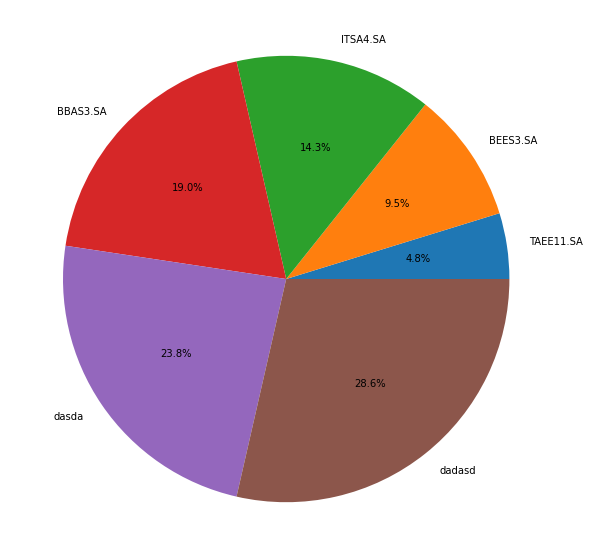

In [317]:
x_list = [1,2,3,4,5,6]#pesos * valor_investido
labels_list = carteira
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.pie(x_list,labels=labels_list,autopct='%1.1f%%')
print('')